In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm

In [2]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Sep_2023.mat'
dat = sio.loadmat(filename)

In [18]:
dat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Sep  8 14:52:08 2023',
 '__version__': '1.0',
 '__globals__': [],
 'curly_Is': array([[ 1.25745826e+00,  1.00000000e+00],
        [-4.89557955e-01,  2.00000000e+00],
        [-9.14774634e-01,  3.00000000e+00],
        ...,
        [-1.93840242e+00,  2.04700000e+03],
        [ 1.10677556e+00,  2.04800000e+03],
        [-4.27056250e-01,  2.04900000e+03]]),
 'curly_Is_relative': array([[-3.33332424e+00,  1.00000000e+00],
        [-6.18279927e+00,  2.00000000e+00],
        [-6.54336868e+00,  3.00000000e+00],
        ...,
        [-7.39204478e+00,  2.04700000e+03],
        [-4.21273431e+00,  2.04800000e+03],
        [-6.92278753e+00,  2.04900000e+03]]),
 'event_curves': array([[0.44693414, 0.44395402, 0.44575238, ...,        nan,        nan,
                nan],
        [0.47305488,        nan, 0.47148176, ...,        nan,        nan,
                nan],
        [0.47171052, 0.47067474, 0.47159099, ...,        nan,  

In [3]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [4]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
recmax_arr = dat['recmax']
recmax = recmax_arr[:,0]
best_imp = best_imp_arr[:,0]
bestflaresname = dat['bestflaresname']


In [5]:
goes_flux = []
for i in range(len(bestflaresname)):
    
    string = bestflaresname[i][0][0]
    if string[-4] == 'B':
        pwr = 1e-7
    elif string[-4] == 'C':
        pwr = 1e-6
    elif string[-4] == 'M':
        pwr = 1e-5
    elif string[-4] == 'X':
        pwr = 1e-4
    
    mult = float(bestflaresname[i][0][0][-3:])
    
    flux = mult*pwr
    goes_flux.append(flux)
                 
                 

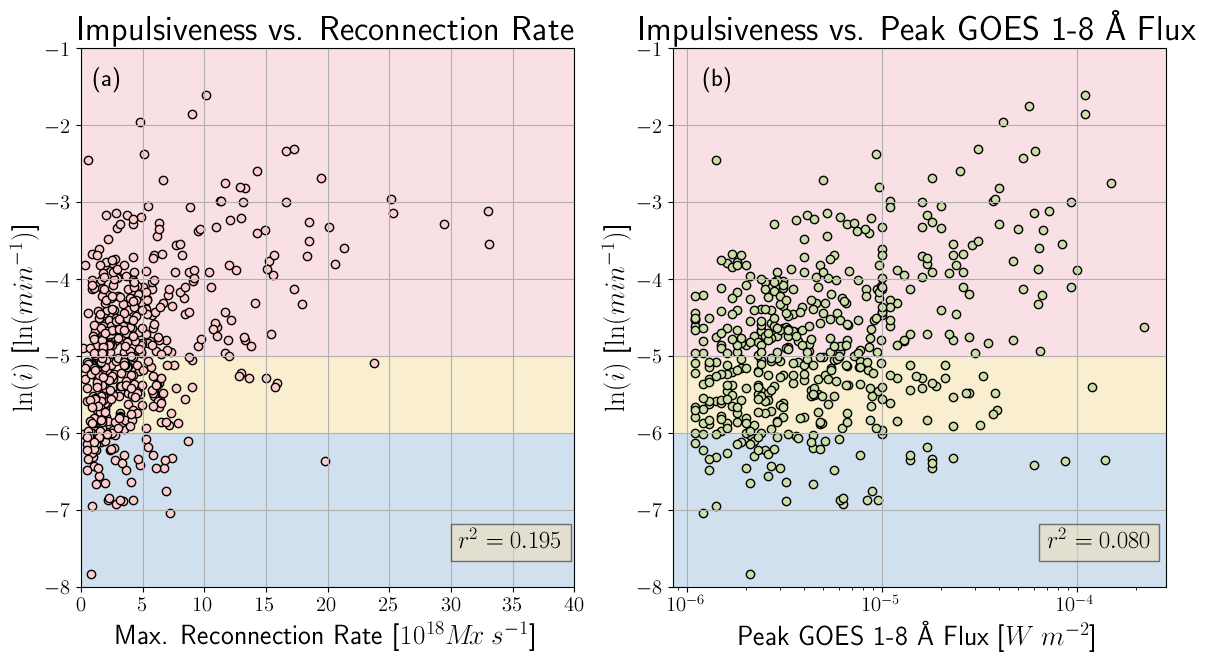

In [17]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax1.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax1.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax1.scatter(recmax/1e18,best_imp,facecolor='#FFCCCC',edgecolor='black')
ax1.grid()
ax1.set_xlim([0,40])
x=list(range(0,45,5))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} M\!x\: s^{-1}$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)

props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(30.6,-7.5, r'$r^2 = 0.195$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)


ax2.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax2.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax2.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES 1-8 \AA\ Flux [$W\:m^{-2}$]',fontsize=20)
ax2.set_title('Impulsiveness vs. Peak GOES 1-8 \AA\ Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(7e-5,-7.5, r'$r^2 = 0.080$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [173]:
cc_imp_goes = np.corrcoef(goes_flux,best_imp)[0,1]**2
print(cc_imp_goes)

0.07961542260600547


In [174]:
cc_imp_recrate = np.corrcoef(recmax,best_imp)[0,1]**2
cc_imp_recrate

0.19478283464689983

In [178]:
len(best_imp[best_imp>-5])

269

In [180]:
len(best_imp[recmax>15e18])

29

In [188]:
len(best_imp[(recmax>15e18) & (best_imp>-5)])

24

In [189]:
269/500

0.538

In [190]:
len(best_imp[(recmax<15e18) & (best_imp>-5)])/len(best_imp[recmax<15e18])

0.5201698513800425

In [193]:
from statsmodels.stats.proportion import proportions_ztest

In [195]:
proportions_ztest(len(best_imp[(recmax>15e18) & (best_imp>-5)]),len(best_imp[recmax>15e18]),value=269/500)

(4.128423544970484, 3.65258847447484e-05)

In [ ]:
# reject null hypothesis, so these are definitely different proportions

#note that z-test might not be good because we haven't drawn a random sample, we have limited to above a certainvalue